위 문서는 Coursera DUKE 대학 statistics with R 강의를 기반으로 작성되었습니다

## 앞으로의 4주!
## 파이썬을 통해 배우는 통계
 - 기술 통계학
 - 확률 변수와 확률 모형
 - 상관 분석
 
## 파이썬을 통해 배우는 선형대수
 - 최적화는?

# 통계학 (Statistics)
데이터를 정보로 만드는 수단

### 정의
- 많은 양의 수치자료를 수집하고, 정리, 요약 및 해석하는 방법을 다루는 과학의 한 분야
- 관심의 대상에 대한 자료를 수집하여, 정리, 요약하고, 이들 자료에 포함된 정보를 토대로 불확실한 사실에 대해 과학적 판단을 내릴 수 있도록 방법을 제시해주는 학문
- 관측 자료를 바탕으로 추론(inference)을 하는 과학의 한 분야로서 불확실성(uncertainty)하에서 보다 합리적인 의사 결정을 하는 방법을 제시해 주는 학문
<br/>

### 기술통계학 (descriptive statistics)
수집된 자료를 정리 및 요약하는 방법을 다루는 통계학. 자료를 표와 그래프로 나타내고 대표값과 산포도로 전반적인 특성을 표현한다.

- 표준화 (Standardization) : 데이터를 __비교,분석__하기위해 다양한 종류의 데이터를 정규분포를 기준으로 나타내는 거다. 관측값에서 평균을 뺴고 표준편차로 나눈다. 

### 추측 통계학 (Inferential statistics)
주어진 자료의 정보를 분석해서 미래의 일어날 상황을 예측하는 통계학. 통계적 추론에서 얻어진 추측이니 어느정도 불확실서을 가지고 있다. 이를 표현하기 위해 확률론을 기반으로 둔다.

#### 모집단과 표본
- 모집단(population) : 관심 있는 특서을 수치로 나타낸 연구 대상. 연구 대상이 같더라도 관심을 가진 특성이 다르면 모집단도 달라질 수 있다.
- 표본(Sample) : 모집단으로 부터 뽑은 부분집합. 조사대상을 의미한다.
- 모수(Parameter) : 모집단의 특성을 나타내는 양적인 값으로 고유한 상수를 나타낸다.

#### 모수에 대한 추론
- 추정 (estimation) : 미지의 모수의 값이 얼마인지, 또는 어떤 범위내에 있는지 표본 결과로 부터 추측하는 것
- 가설의 검정 (test of hypothesis) : 모수의 값의 범위를 구하는 두개의 결과를 세우고 참인지를 표본의 결과로 부터 판단하는 것.

# 확률론 vs 통계학

- 확률론적 관점 : 이미 알고있는 모집단에서 어떤 사건이 일어날 것인가?
- 통계적 관점 : 표본에서 얻은 정보를 이용하여 미지의 모집단을 추론해 보자

# 기술통계학 - 확률적 데이터와 분포 특성

- 결정론적 데이터 : 항상 동일한 값이 나오는 데이터를 결정론적 데이터
- 확률적 데이터 : 예측하지 않고 Sampling에 따라 다른 값이 나오는 것이 확률적 데이터라고합니다.
    - 데이터 집합의 분포 특성이 중요하다.
    - 특징을 나타내는 값
        - 평균 mean()
        - 중앙 median()
        - 히스토그램 계산 histogram()
        - 최빈 argmax()


In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [36]:
np.random.seed(0)
x = np.random.normal(size=100)

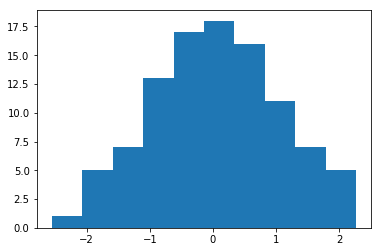

In [37]:
plt.hist(x)
plt.show()

In [38]:
np.mean(x), np.median(x)

(0.059808015534485, 0.09409611943799814)

In [39]:
#np.linspace(시작, 끝, 갯수) (-10,10,20 = -10부터 10까지 20개 단위로 나눠보자!) 
ns, bins = np.histogram(x, bins=np.linspace(-10,10,20))
print(ns, bins)

[ 0  0  0  0  0  0  0  6 21 45 21  7  0  0  0  0  0  0  0] [-10.          -8.94736842  -7.89473684  -6.84210526  -5.78947368
  -4.73684211  -3.68421053  -2.63157895  -1.57894737  -0.52631579
   0.52631579   1.57894737   2.63157895   3.68421053   4.73684211
   5.78947368   6.84210526   7.89473684   8.94736842  10.        ]


In [41]:
M = np.argmax(ns)
bins[M], bins[M+1]

(-0.526315789473685, 0.5263157894736832)

## 여기서 문제!

- NumPy를 사용하여 100개의 숫자를 무작위로 생성한 후 히스토그램을 그리고 샘플 평균을 구한다.
- 100개의 숫자 생성 및 샘플 평균 계산을 50번 반복하여 50개의 샘플 평균을 구한다.
- 그다음 2번쨰 자리에서 반올림 해보자!

In [49]:
sample_mean = []
for i in range(100):
    np.random.seed(i)
    x = np.random.normal(size=100)
    sample_mean.append(np.mean(x))

In [50]:
np.array(sample_mean).mean().round(2)

0.0

# 분산과 표준편차

- 데이터 집합의 특성을 나타내기 위해 사용되는 또 다른 특징값으로는 분산과 표준편차가 있다.
- 평균이나 기댓값이 분포의 위치를 대표하는 것이라면, 분포의 폭을 대표한다

$$
s^2 = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m)^2
$$

### 비편향 샘플 분산

$$
s^2_{\text{unbiased}} = \dfrac{1}{N-1}\sum_{i=1}^{N} (x_i-m)^2
$$

- 분산 : var()
- 표준편차 : std()

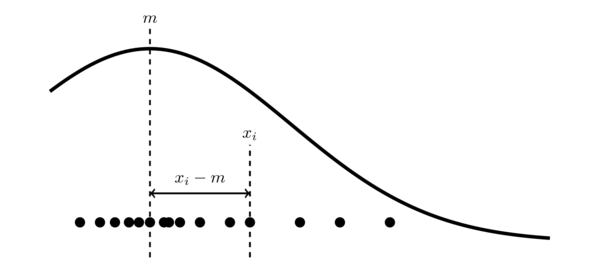

In [54]:
np.var(x)

0.9812079031734594

In [55]:
np.var(x, ddof=1)

0.9911190941146054

# 외도, 첨도, 모멘트

- 외도(Skewness) : 평균과의 거리의 세제곱을 이용하여 구한 특징값은 왜도이다 | 대칭성을 보고싶을때 구한다
- 첨도(Kurtosis) : 평균과의 거리의 네제곱을 이용하여 구한 특징값을 첨도라고한다 | 데이터가 중앙에 몰려있는지를 보고싶을때 쓴다.
- 모멘트(Moment) : 고차의 제곱을 통해 구하는 특징값이다. 평균은 1차 모멘트, 분산은 2차 모멘트, 왜도와 첨도는 3,4차 모멘트이다

## 같은 확률 분포란?

$$
\begin{eqnarray}
평균 : \text{E}[X] &=& \text{E}[Y] \\
분산 : \text{E}[(X-\mu_X)^2] &=& \text{E}[(Y-\mu_Y)^2] \\
왜도 : \text{E}[(X-\mu_X)^3] &=& \text{E}[(Y-\mu_Y)^3] \\
첨도 : \text{E}[(X-\mu_X)^4] &=& \text{E}[(Y-\mu_Y)^4] \\
\text{E}[(X-\mu_X)^5] &=& \text{E}[(Y-\mu_Y)^5] \\
\vdots &=& \vdots \\
\end{eqnarray}
$$

------------

# 공분산과 상관계수

1차원 -> 2차원

- 두 개 이상의 서로 관련을 가지는 자료 값의 집합이나 혹은 확률 변수들의 결합 분포는 heatmap같은 방식이나 결합확률 분포로 나타나겠죠!
- 다변수 확률 변수도, 단변수 경우처럼 평균, 분산과 같은 대표값을 가질 수 있다. 그 중 가장 중요한 것이 자료 간의 상관 관계를 나타내는 공분산(covariance)과 상관계수(correlation coefficient)이다. 공분산과 상관계수도 샘플 자료 집합에 대해 정의되는 샘플 공분산, 샘플 상관계수와, 확률 변수에 대해 정의되는 공분산, 상관계수가 있습니다.

### Sample 공분산

$$
s_{xy} = \dfrac{1}{N}\sum_{i=1}^{N} (x_i-m_x)(y_i-m_y)
$$

샘플 공분산(sample covariance)은 다음과 같이 정의된다. 여기에서  xi 와  yi 는 각각  i 번째의  x  자료와  y 자료의 값을 가리키고,  $m_x$ 와  $m_y$ 는  $x$  자료와  $y$ 자료의 샘플 평균을 가리킨다.